In [1]:
import numpy as np
import matplotlib.pyplot as plt

1.0
MSE: 0.124368908299931


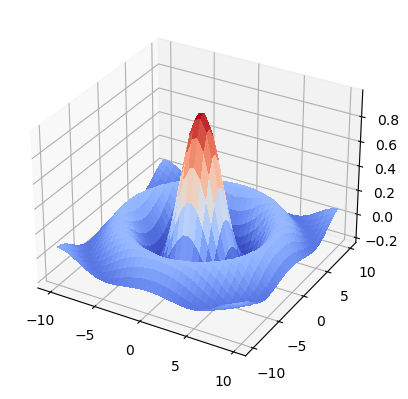

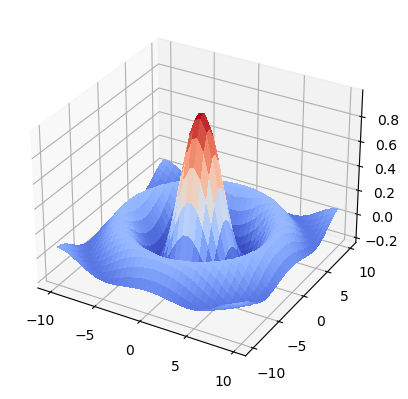

In [60]:
from matplotlib import cm

x1,x2 = np.meshgrid(
    np.arange(-10,10,0.6),
    np.arange(-10,10,0.6)
)
x = np.array( (x1.ravel(), x2.ravel()) ).T
d_ = (np.sin(np.sqrt(x1**2+x2**2)) / 
      np.sqrt(x1**2+x2**2));

fig, ax = plt.subplots(
    subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1, x2, d_, 
                       cmap=cm.coolwarm,
                       linewidth=0, 
                       antialiased=False)

d = (np.sin(np.sqrt(x[:,0]**2+x[:,1]**2)) 
     / np.sqrt(x[:,0]**2+x[:,1]**2));
d = np.array( [d] ).T

from sklearn.gaussian_process import (
    GaussianProcessRegressor)
from sklearn.gaussian_process.kernels import (
    ConstantKernel, RBF)

kernel = (ConstantKernel(1.0, 
                constant_value_bounds="fixed") 
          * RBF(1.0, length_scale_bounds="fixed") )
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(x, d)
print(gpr.score(x, d))

y,std = gpr.predict(x, return_std=True)

mse = (np.sum(np.sqrt(np.abs(y - d[0])**2))/ 
       np.prod(y.shape) )
print(f"MSE: {mse}")
y_ = y.reshape(d_.shape)
          
fig, ax = plt.subplots(
    subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1, x2, y_, 
                       cmap=cm.coolwarm,
                       linewidth=0, 
                       antialiased=False)          

In [48]:
d_.shape

(34, 34)

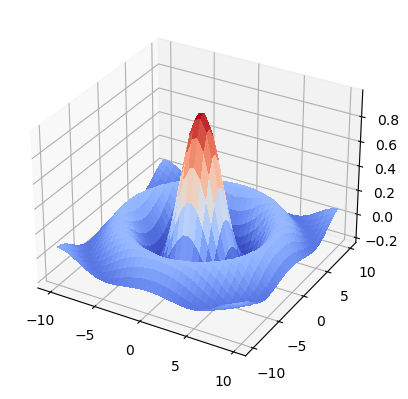

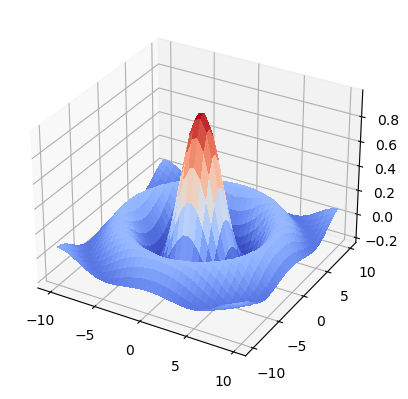

In [51]:
from matplotlib import cm


In [ ]:
z = sin(sqrt(x1.^2+x2.^2)) ./ sqrt(x1.^2+x2.^2);
surf(x1,x2,z)

x1_ = reshape(x1,1,[]);
x2_ = reshape(x2,1,[]);
d = sin(sqrt(x1_.^2+x2_.^2)) ./ sqrt(x1_.^2+x2_.^2);

x = [x1_;x2_]

spread = .5;
K =1000;             %  max number of neurons
goal = 0.00000001;   % Minimalny akceptowalny błąd (SSE)
Ki = 5;		    % liczba neuron ow dodawana jednoczesnie
net = newrb(x,d,goal,spread, K) %,K,Ki);
%view (net)
y = net(x);  	    % generacja wyników sieci na danych wejściowych

z_ = reshape(y, size(x1))
figure
surf(x1,x2,z_)
sum(sum(abs(z - z_)))